In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
raw_df =  pd.read_csv('/workspaces/22022546_T--Nguy-n-D-ng/Data/ktqdNEU.csv')
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        114 non-null    int64  
 1   text                           113 non-null    object 
 2   post_text                      96 non-null     object 
 3   shared_text                    18 non-null     object 
 4   original_text                  0 non-null      float64
 5   time                           114 non-null    object 
 6   timestamp                      114 non-null    int64  
 7   image                          77 non-null     object 
 8   image_lowquality               114 non-null    object 
 9   images                         114 non-null    object 
 10  images_description             114 non-null    object 
 11  images_lowquality              114 non-null    object 
 12  images_lowquality_description  114 non-null    obj

In [3]:
clean_data = raw_df[['post_id','text','post_text','time','images_description','comments','shares','comments_full','reactors','reactions','reaction_count']]
clean_data

,post_id,text,post_text,time,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
0,732948108863591,"Thư viện điện tử 11 triệu USD, triệu cuốn sách...","Thư viện điện tử 11 triệu USD, triệu cuốn sách...",2023-11-25 11:25:19,"['May be an image of text', 'May be an image o...",175,77,"[{'comment_id': '648537020689218', 'comment_ur...",[],"{'like': 1123, 'love': 382, 'haha': 4, 'wow': ...",1542
1,323743073790793,"SUN, NOV 26\nChương trình trải nghiệm: 1 ngày ...",NaN,2023-11-24 10:31:29,[],628,0,[],NaN,NaN,1300
2,732286135596455,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,2023-11-24 07:07:41,"[""May be an image of 1 person, dais and text t...",0,0,[],"[{'name': 'Lê Quang Mênhh', 'link': 'https://f...","{'like': 82, 'love': 7}",89
3,730862365738832,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,2023-11-21 14:17:08,[],55,22,"[{'comment_id': '250924264662383', 'comment_ur...","[{'name': 'Thùy Linh', 'link': 'https://facebo...","{'like': 840, 'love': 364, 'wow': 12, 'care': 11}",1227
4,730382429120159,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,2023-11-20 16:02:01,"['May be an image of 15 people and text', 'May...",1,8,[],"[{'name': 'Bao Thanh Thien', 'link': 'https://...","{'like': 872, 'love': 431, 'care': 11}",1314
...,...,...,...,...,...,...,...,...,...,...,...
109,676193010732292,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-27 00:00:07,[],220,72,"[{'comment_id': '1354054158850753', 'comment_u...","[{'name': 'Mai Trang', 'link': 'https://facebo...","{'like': 656, 'love': 244, 'haha': 2, 'wow': 1...",907
110,1270136470311946,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 05:59:52,[],111,48,"[{'comment_id': '643658751072857', 'comment_ur...","[{'name': 'Phan Kim Nhã', 'link': 'https://fac...","{'like': 193, 'love': 124, 'care': 3}",320
111,1237176660290613,"SAT, AUG 26\nLỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY N...",NaN,2023-08-26 05:36:06,[],5,0,[],NaN,NaN,218
112,1358907194696015,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 00:01:04,[],988,272,"[{'comment_id': '823626852603976', 'comment_ur...","[{'name': 'Quang Thao Phan', 'link': 'https://...","{'like': 2804, 'love': 1257, 'haha': 12, 'wow'...",4105


CLEANING DATA

In [4]:
clean_data = clean_data.fillna({"reactions" : "{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'care': 0, 'sad': 0, 'angry': 0}"})
#for i in clean_data:
clean_data

,post_id,text,post_text,time,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
0,732948108863591,"Thư viện điện tử 11 triệu USD, triệu cuốn sách...","Thư viện điện tử 11 triệu USD, triệu cuốn sách...",2023-11-25 11:25:19,"['May be an image of text', 'May be an image o...",175,77,"[{'comment_id': '648537020689218', 'comment_ur...",[],"{'like': 1123, 'love': 382, 'haha': 4, 'wow': ...",1542
1,323743073790793,"SUN, NOV 26\nChương trình trải nghiệm: 1 ngày ...",NaN,2023-11-24 10:31:29,[],628,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",1300
2,732286135596455,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,2023-11-24 07:07:41,"[""May be an image of 1 person, dais and text t...",0,0,[],"[{'name': 'Lê Quang Mênhh', 'link': 'https://f...","{'like': 82, 'love': 7}",89
3,730862365738832,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,2023-11-21 14:17:08,[],55,22,"[{'comment_id': '250924264662383', 'comment_ur...","[{'name': 'Thùy Linh', 'link': 'https://facebo...","{'like': 840, 'love': 364, 'wow': 12, 'care': 11}",1227
4,730382429120159,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,2023-11-20 16:02:01,"['May be an image of 15 people and text', 'May...",1,8,[],"[{'name': 'Bao Thanh Thien', 'link': 'https://...","{'like': 872, 'love': 431, 'care': 11}",1314
...,...,...,...,...,...,...,...,...,...,...,...
109,676193010732292,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-27 00:00:07,[],220,72,"[{'comment_id': '1354054158850753', 'comment_u...","[{'name': 'Mai Trang', 'link': 'https://facebo...","{'like': 656, 'love': 244, 'haha': 2, 'wow': 1...",907
110,1270136470311946,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 05:59:52,[],111,48,"[{'comment_id': '643658751072857', 'comment_ur...","[{'name': 'Phan Kim Nhã', 'link': 'https://fac...","{'like': 193, 'love': 124, 'care': 3}",320
111,1237176660290613,"SAT, AUG 26\nLỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY N...",NaN,2023-08-26 05:36:06,[],5,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",218
112,1358907194696015,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 00:01:04,[],988,272,"[{'comment_id': '823626852603976', 'comment_ur...","[{'name': 'Quang Thao Phan', 'link': 'https://...","{'like': 2804, 'love': 1257, 'haha': 12, 'wow'...",4105


In [5]:
clean_data.loc[clean_data['reaction_count'] == 0]

,post_id,text,post_text,time,images_description,comments,shares,comments_full,reactors,reactions,reaction_count


In [6]:
sorted_data = clean_data.sort_values(by = 'reaction_count', ascending=False)
sorted_data

,post_id,text,post_text,time,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
95,685739823584420,NaN,NaN,2023-09-06 03:24:12,['May be an image of text'],114,18,"[{'comment_id': '6464439700339100', 'comment_u...","[{'name': 'Dương Ngọc Lan', 'link': 'https://f...","{'like': 4753, 'love': 1771, 'haha': 26, 'wow'...",6617
44,712447980913604,CHÚC MỪNG NGÀY PHỤ NỮ VIỆT NAM 20/10\n\n🌺 Nhân...,CHÚC MỪNG NGÀY PHỤ NỮ VIỆT NAM 20/10\n\n🌺 Nhân...,2023-10-20 01:00:09,"[""May be an image of text that says 'NH CONICN...",361,132,"[{'comment_id': '822701516273487', 'comment_ur...","[{'name': 'Danh Minh', 'link': 'https://facebo...","{'like': 3136, 'love': 2334, 'haha': 34, 'wow'...",5606
107,680243077467428,"Nam thanh, Nữ tú rạng ngời trong Lễ tốt nghiệp...","Nam thanh, Nữ tú rạng ngời trong Lễ tốt nghiệp...",2023-08-27 14:31:57,"['No photo description available.', 'No photo ...",164,45,"[{'comment_id': '1434628217117936', 'comment_u...","[{'name': 'Chu Mạnh', 'link': 'https://faceboo...","{'like': 4056, 'love': 1328, 'haha': 9, 'wow':...",5420
112,1358907194696015,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 00:01:04,[],988,272,"[{'comment_id': '823626852603976', 'comment_ur...","[{'name': 'Quang Thao Phan', 'link': 'https://...","{'like': 2804, 'love': 1257, 'haha': 12, 'wow'...",4105
48,906959070527185,"WED, OCT 18\nGặp gỡ tháng 10",NaN,2023-10-16 12:52:54,[],941,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",3900
...,...,...,...,...,...,...,...,...,...,...,...
31,719593830199019,Hội thảo khoa học “Những vấn đề đặt ra trong đ...,Hội thảo khoa học “Những vấn đề đặt ra trong đ...,2023-11-01 06:32:35,"[""May be an image of 1 person, newsroom and te...",2,0,[],"[{'name': 'Phạm Thị Loan', 'link': 'https://fa...","{'like': 59, 'love': 4, 'care': 1}",64
40,253516003971426,"THU, OCT 26\nHTKHQG: THÚC ĐẨY SỰ KẾT NỐI, PHỔ ...",NaN,2023-10-25 14:52:23,[],0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",62
30,720199276805141,Trường Đại học Kinh tế Quốc dân đồng hành cùng...,Trường Đại học Kinh tế Quốc dân đồng hành cùng...,2023-11-02 08:58:48,"['May be an image of 1 person, newsroom and te...",0,1,[],"[{'name': 'Lê Quang Mênhh', 'link': 'https://f...","{'like': 58, 'love': 4}",62
71,697711545720581,Hướng dẫn sử dụng tài nguyên điện tử Tạp chí K...,Hướng dẫn sử dụng tài nguyên điện tử Tạp chí K...,2023-09-26 03:30:40,[],1,6,[],"[{'name': 'Nguyễn Huy Sao', 'link': 'https://f...","{'like': 49, 'love': 10}",59


ANALYSE DATA

In [7]:
highest_reaction_post = sorted_data.iloc[0]
highest_reaction_post

post_id                                                 685739823584420
text                                                                NaN
post_text                                                           NaN
time                                                2023-09-06 03:24:12
images_description                          ['May be an image of text']
comments                                                            114
shares                                                               18
comments_full         [{'comment_id': '6464439700339100', 'comment_u...
reactors              [{'name': 'Dương Ngọc Lan', 'link': 'https://f...
reactions             {'like': 4753, 'love': 1771, 'haha': 26, 'wow'...
reaction_count                                                     6617
Name: 95, dtype: object

In [8]:
highest_reaction_post['text']

nan

In [9]:
highest_reaction_post['reaction_count']

6617

In [10]:
highest_reaction_post['reactions']

"{'like': 4753, 'love': 1771, 'haha': 26, 'wow': 7, 'care': 44, 'sad': 15, 'angry': 1}"

In [11]:
first_row = highest_reaction_post
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']
reactions


{'like': 4753,
 'love': 1771,
 'haha': 26,
 'wow': 7,
 'care': 44,
 'sad': 15,
 'angry': 1,
 'shares': 18,
 'comments': 114}

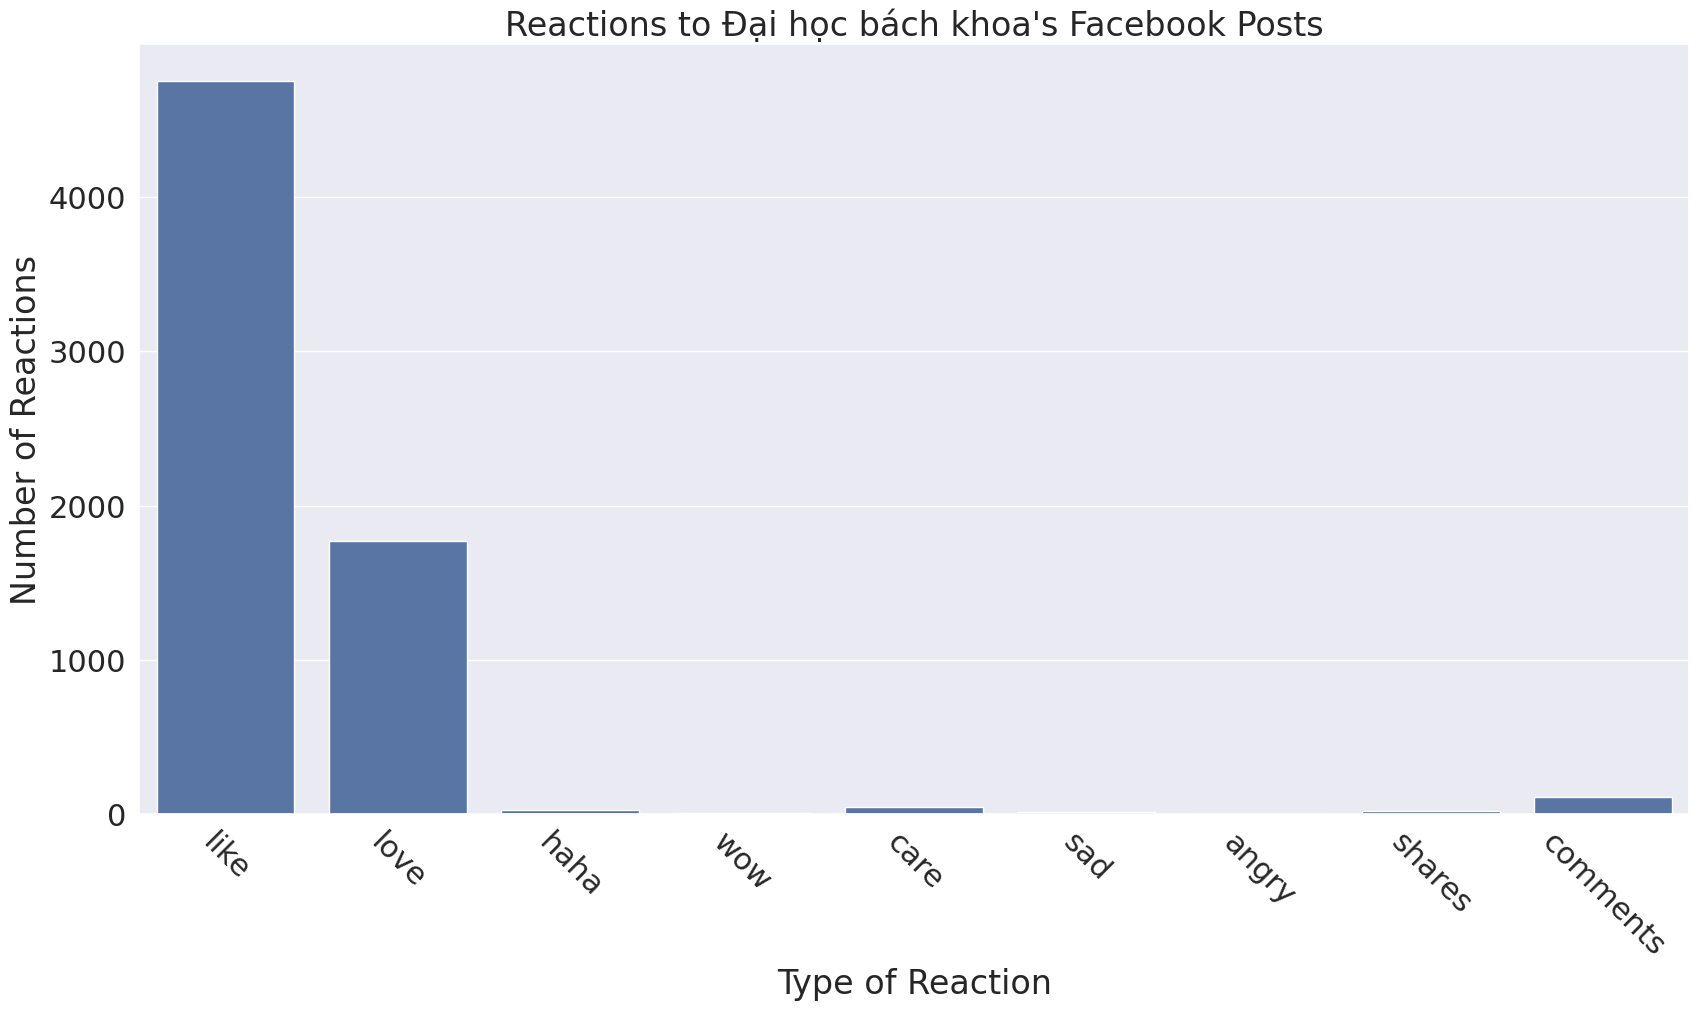

In [12]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale=2)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to Đại học bách khoa's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

In [13]:
clean_data['reaction_count'].mean()

845.6228070175439

In [14]:
clean_data['comments'].mean()

81.39473684210526

In [15]:
clean_data['shares'].mean()

21.56140350877193

In [16]:
month = []
hour = []
days = []
for i in range(len(clean_data)):
    time = clean_data['time'][i].split(" ")[1].split(":")
    date = clean_data['time'][i].split(" ")[0].split("-")
    month.append(int(date[1]))
    hour.append(int(time[0]))
    days.append(date[2])

Text(0, 0.5, 'Số lượng bài viết')

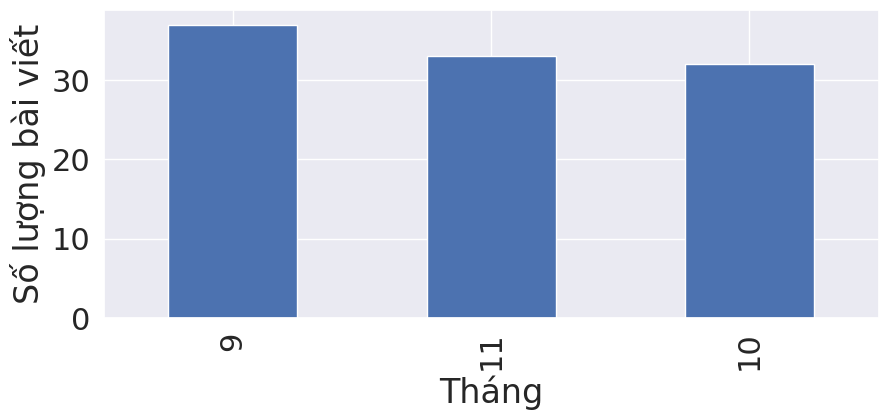

In [17]:
clean_data['day'] = days
clean_data['month'] = month
f = clean_data.loc[clean_data['month'] > 8]
s = f['month'].value_counts()
bp = s.plot(kind='bar', figsize=(10,4))
bp.set_xlabel("Tháng")
bp.set_ylabel("Số lượng bài viết")

Text(0, 0.5, 'Số bài đăng')

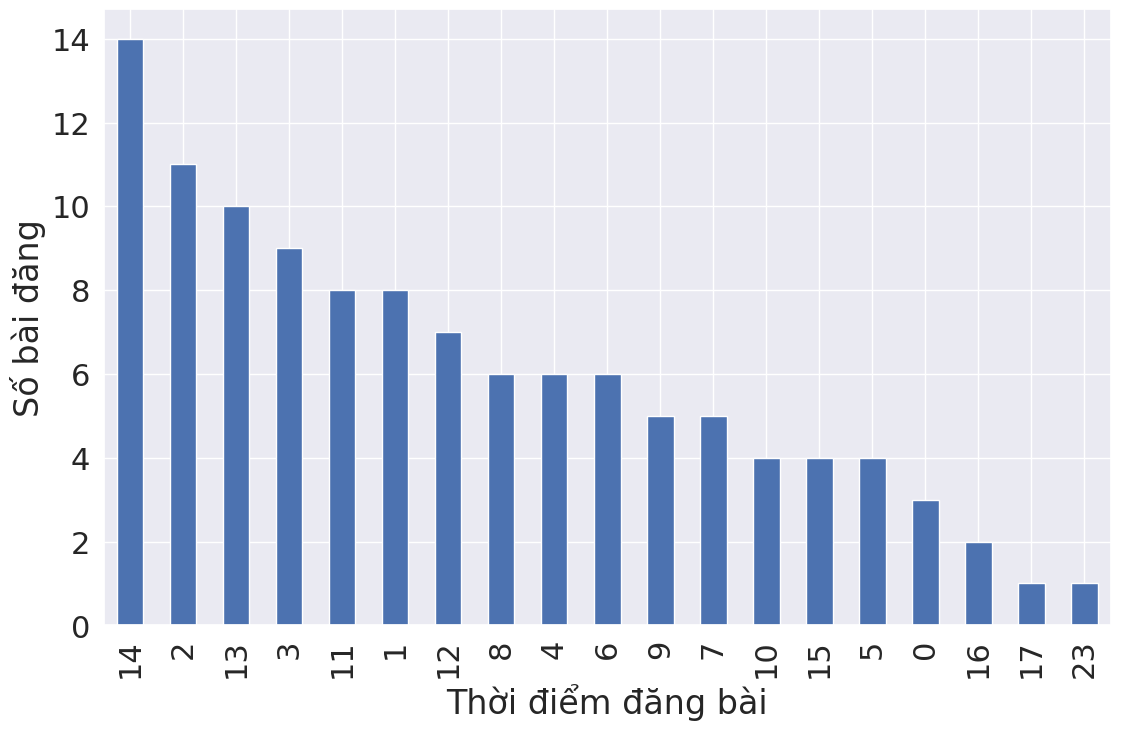

In [18]:
clean_data['hour'] = hour
h = clean_data['hour'].value_counts()
t = h.plot(kind = 'bar', figsize=(13,8))
t.set_xlabel('Thời điểm đăng bài')
t.set_ylabel('Số bài đăng')

In [19]:
import ast
thich = []
yeu_thich = []
haha = []
wow = []
thuong_thuong = []
buon = []
phan_no = []
for i in range(len(clean_data)):
     if ((clean_data['reaction_count'][i] != 0)):
            dictionary_result = ast.literal_eval(clean_data['reactions'][i])
            so_luot_thich = dictionary_result.get('thích', 0) + dictionary_result.get('like',0)
            so_yeu_thich = dictionary_result.get('yêu thích', 0) + dictionary_result.get('love', 0)
            so_haha = dictionary_result.get('haha', 0)
            so_wow = dictionary_result.get('wow',0)
            so_thuong_thuong = dictionary_result.get('thương thương',0) +dictionary_result.get('care', 0)
            so_buon = dictionary_result.get('buồn', 0) + dictionary_result.get('sad', 0)
            so_phan_no = dictionary_result.get('phẫn nộ',0) + dictionary_result.get('angry', 0)
            thich.append(so_luot_thich)
            yeu_thich.append(so_yeu_thich)
            haha.append(so_haha)
            wow.append(so_wow)
            thuong_thuong.append(so_thuong_thuong)
            buon.append(so_buon)
            phan_no.append(so_phan_no)
     else:
            thich.append(0)
            yeu_thich.append(0)
            haha.append(0)
            wow.append(0)
            thuong_thuong.append(0)
            buon.append(0)
            phan_no.append(0)


In [20]:
s = pd.DataFrame({'Số lượng': [sum(thich),sum(yeu_thich),sum(haha),sum(wow),sum(thuong_thuong),sum(buon),sum(phan_no)],
                  'Phần trăm (%)': [(sum(thich)/sum(raw_df['reaction_count']))*100,
                                   (sum(yeu_thich)/sum(raw_df['reaction_count']))*100,
                                   (sum(haha)/sum(raw_df['reaction_count']))*100,
                                   (sum(wow)/sum(raw_df['reaction_count']))*100,
                                   (sum(thuong_thuong)/sum(raw_df['reaction_count']))*100,
                                   (sum(buon)/sum(raw_df['reaction_count']))*100,
                                   (sum(phan_no)/sum(raw_df['reaction_count']))*100]})
s.index = ['Thích','Yêu thích','Haha','Wow','Thương thương','Buồn','Phẫn nộ']
s

,Số lượng,Phần trăm (%)
Thích,63558,65.930851
Yêu thích,21455,22.255993
Haha,2154,2.234417
Wow,215,0.223027
Thương thương,709,0.735470
Buồn,997,1.034222
Phẫn nộ,6,0.006224


<Axes: >

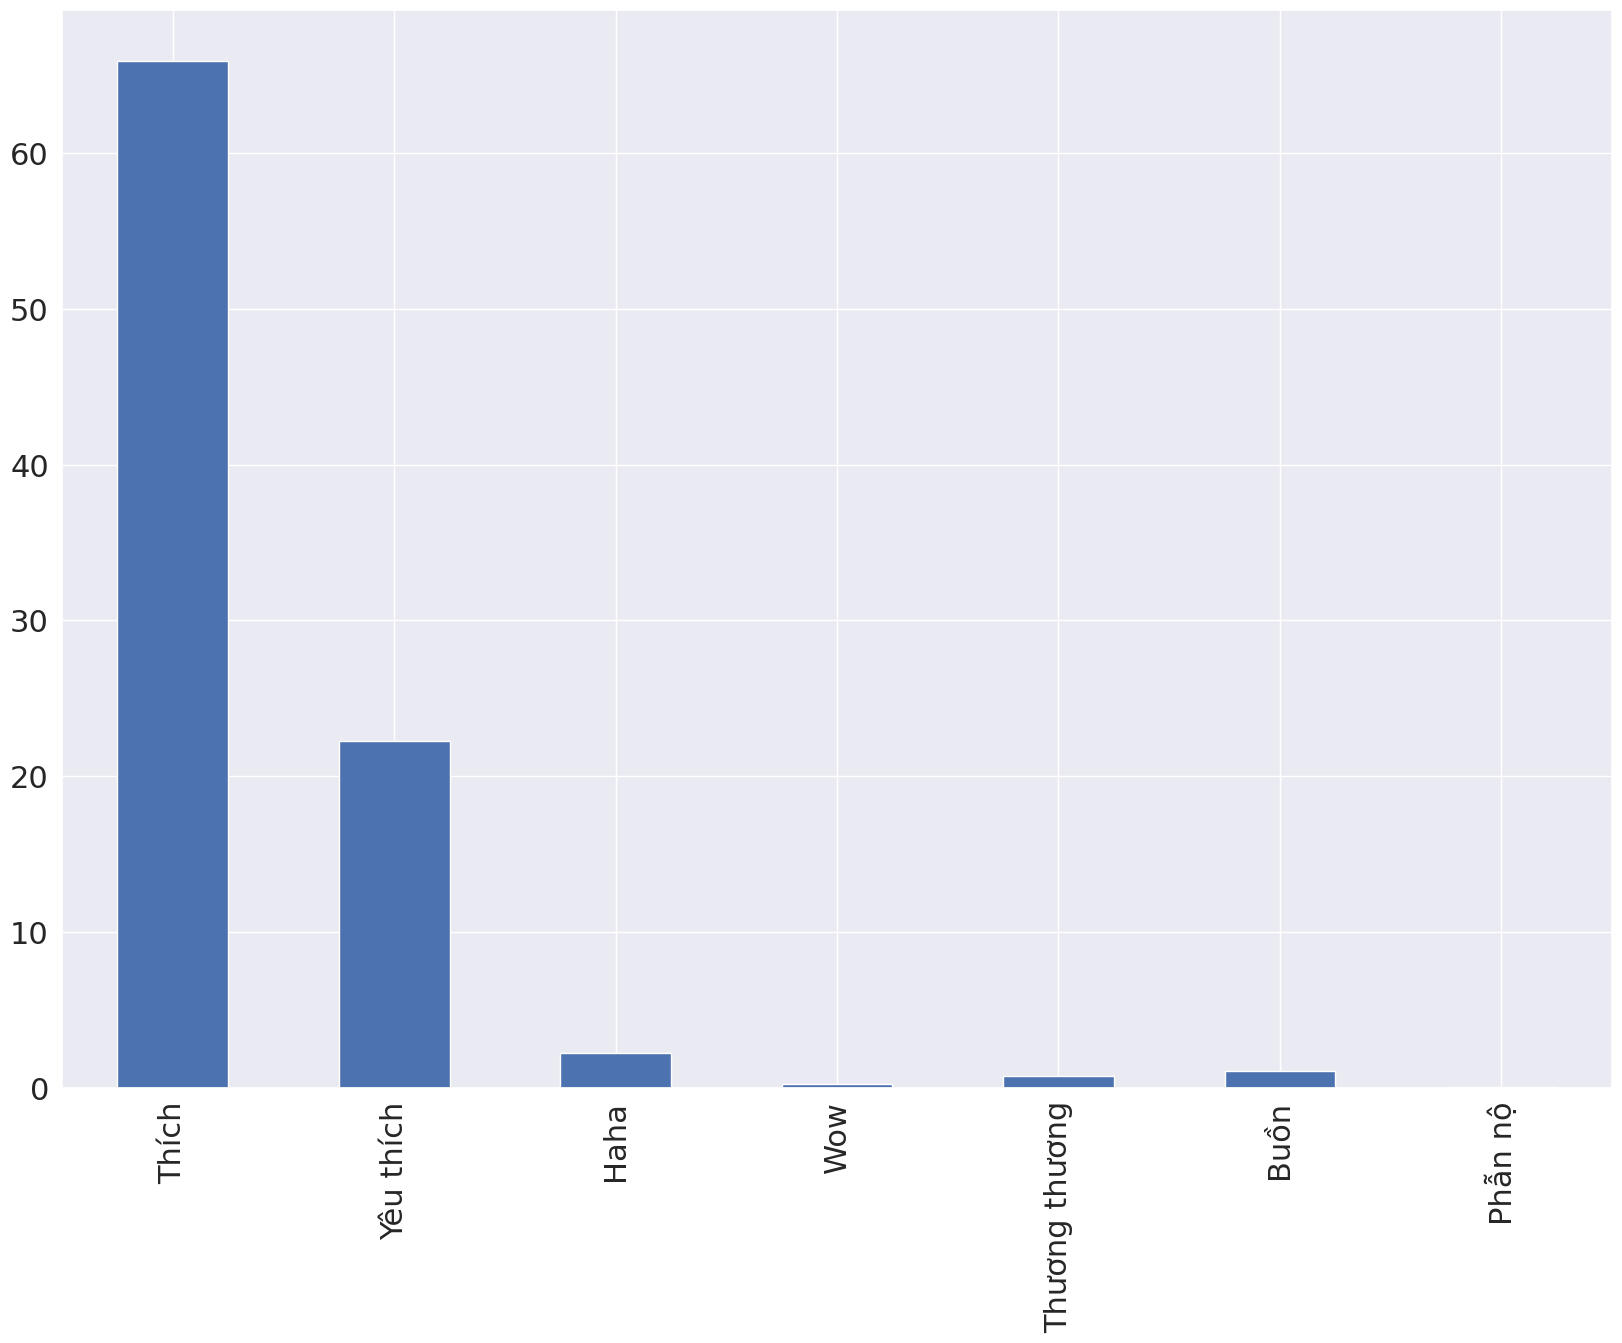

In [21]:
s['Phần trăm (%)'].plot(kind='bar', figsize=(20,14))

In [22]:
clean_data['thích'] = thich
clean_data['yêu_thích'] = yeu_thich
clean_data['haha'] = haha
clean_data['wow'] = wow
clean_data['thương_thương'] = thuong_thuong
clean_data['buồn'] = buon
clean_data['phẫn_nộ'] = phan_no
clean_data['day'] = days

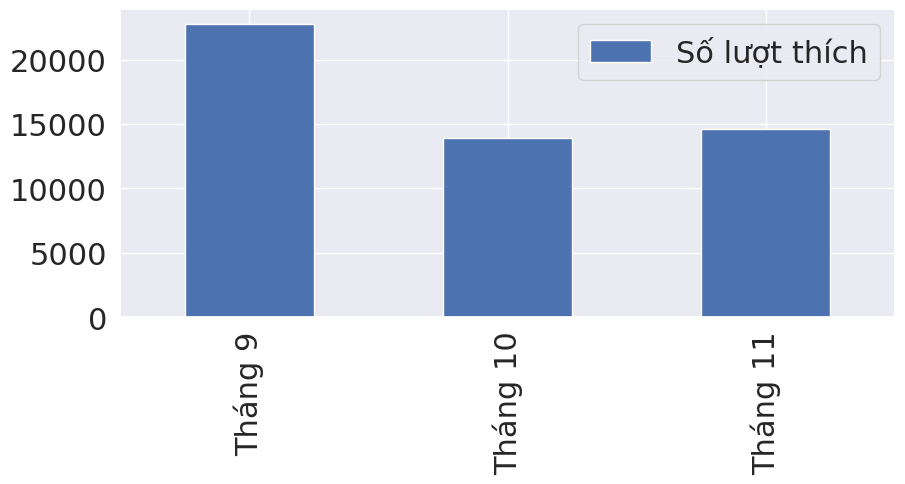

In [23]:
likes_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].thích)
likes_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].thích)
likes_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].thích)
l = pd.DataFrame({'Số lượt thích': [likes_of_month_9,likes_of_month_10,likes_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

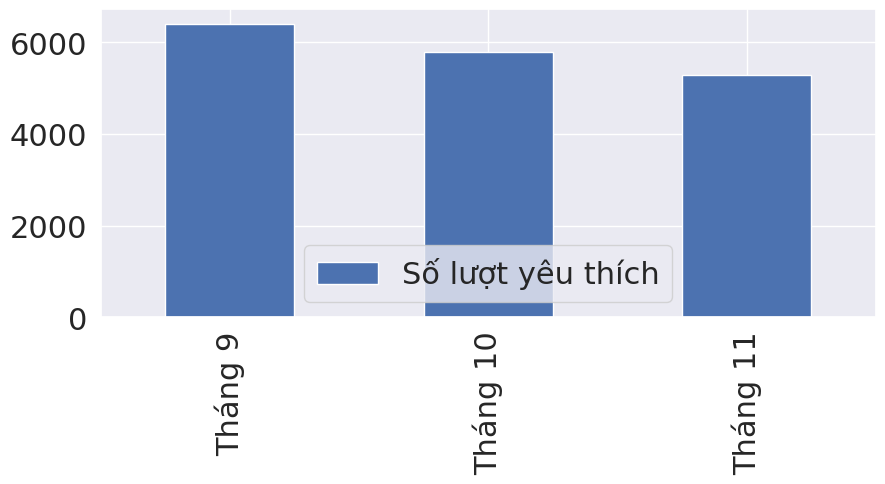

In [24]:
loves_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].yêu_thích)
loves_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].yêu_thích)
loves_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].yêu_thích)
l = pd.DataFrame({'Số lượt yêu thích': [loves_of_month_9,loves_of_month_10,loves_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

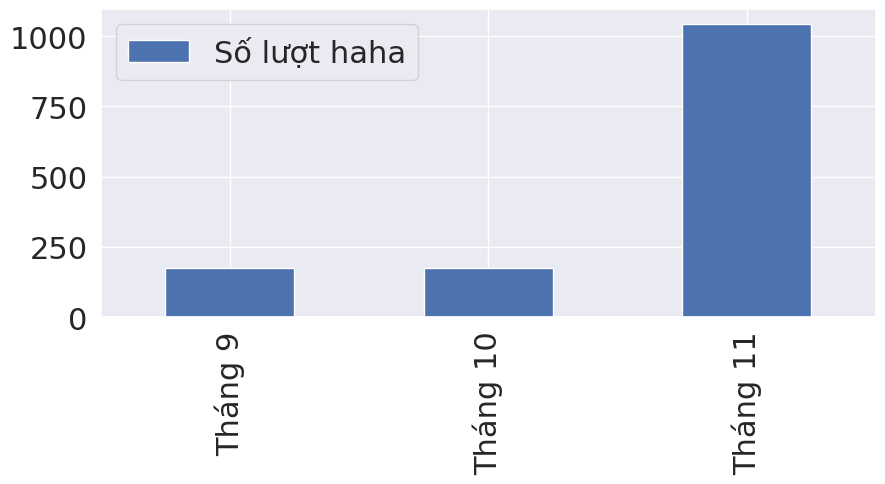

In [25]:
haha_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].haha)
haha_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].haha)
haha_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].haha)
l = pd.DataFrame({'Số lượt haha': [haha_of_month_9,haha_of_month_10,haha_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

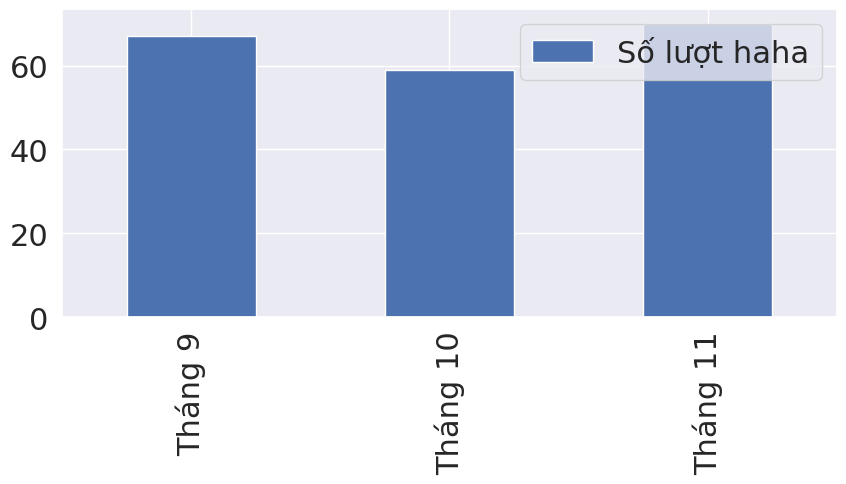

In [26]:
wow_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].wow)
wow_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].wow)
wow_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].wow)
l = pd.DataFrame({'Số lượt haha': [wow_of_month_9,wow_of_month_10,wow_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

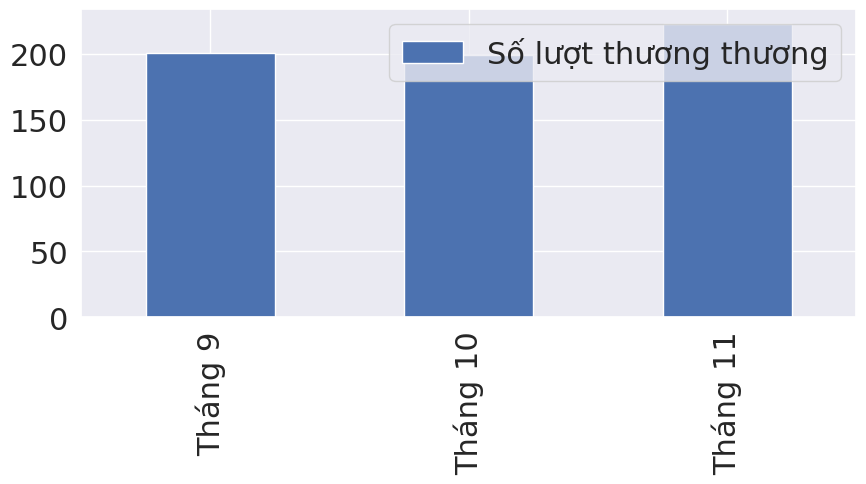

In [27]:
tt_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].thương_thương)
tt_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].thương_thương)
tt_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].thương_thương)
l = pd.DataFrame({'Số lượt thương thương': [tt_of_month_9,tt_of_month_10,tt_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

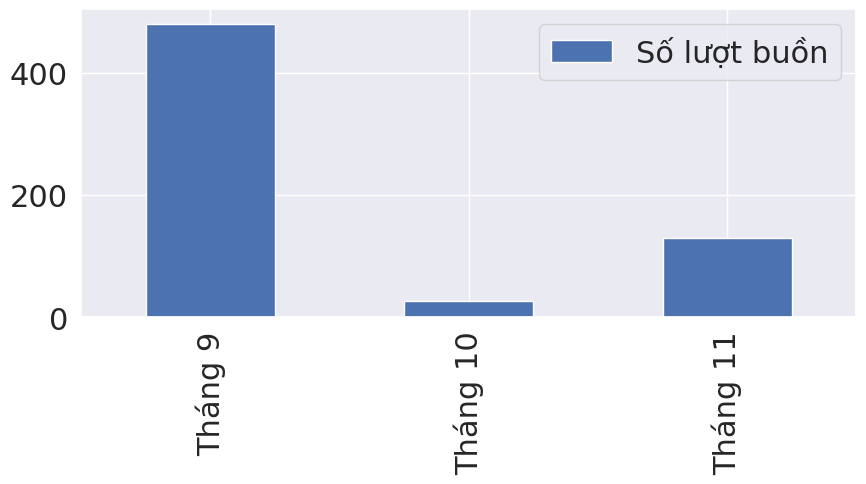

In [28]:
buon_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].buồn)
buon_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].buồn)
buon_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].buồn)
l = pd.DataFrame({'Số lượt buồn': [buon_of_month_9,buon_of_month_10,buon_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

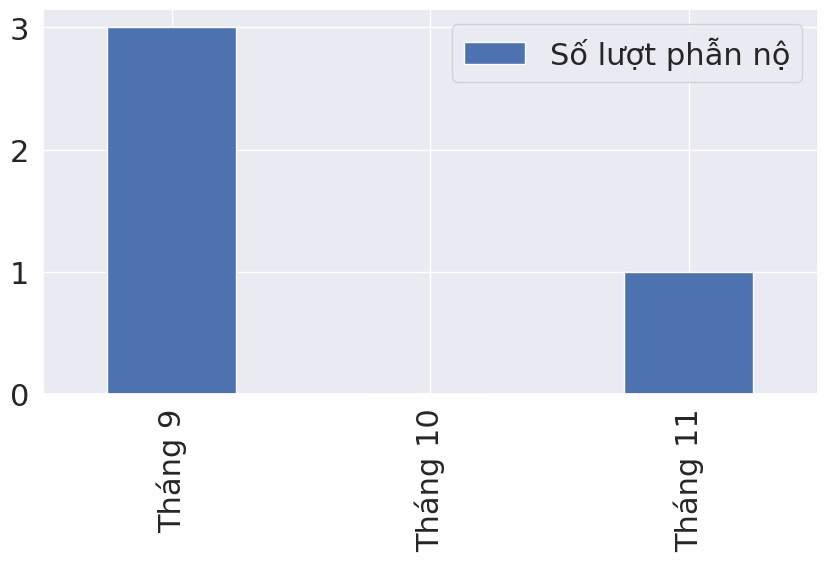

In [29]:
phan_no_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].phẫn_nộ)
phan_no_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].phẫn_nộ)
phan_no_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].phẫn_nộ)
l = pd.DataFrame({'Số lượt phẫn nộ': [phan_no_of_month_9,phan_no_of_month_10,phan_no_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,5))

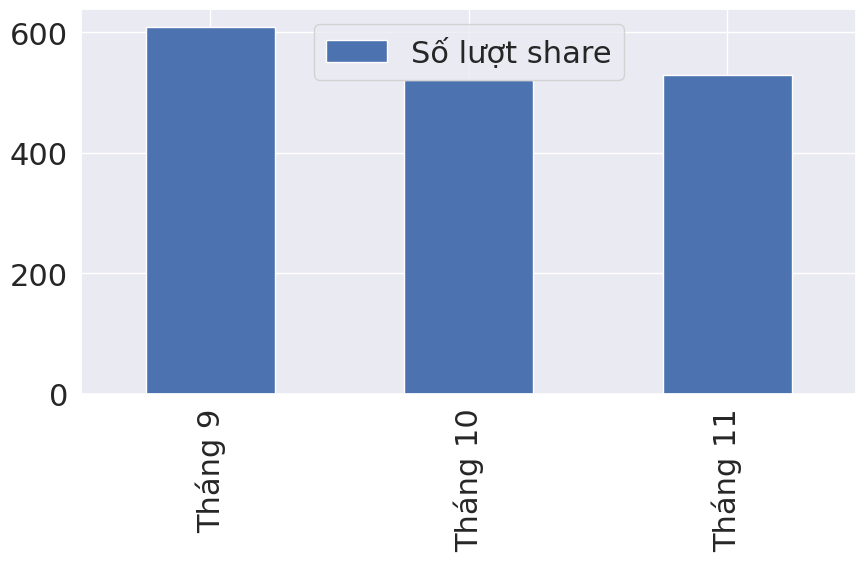

In [30]:
shares_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].shares)
shares_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].shares)
shares_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].shares)
l = pd.DataFrame({'Số lượt share': [shares_of_month_9,shares_of_month_10,shares_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,5))

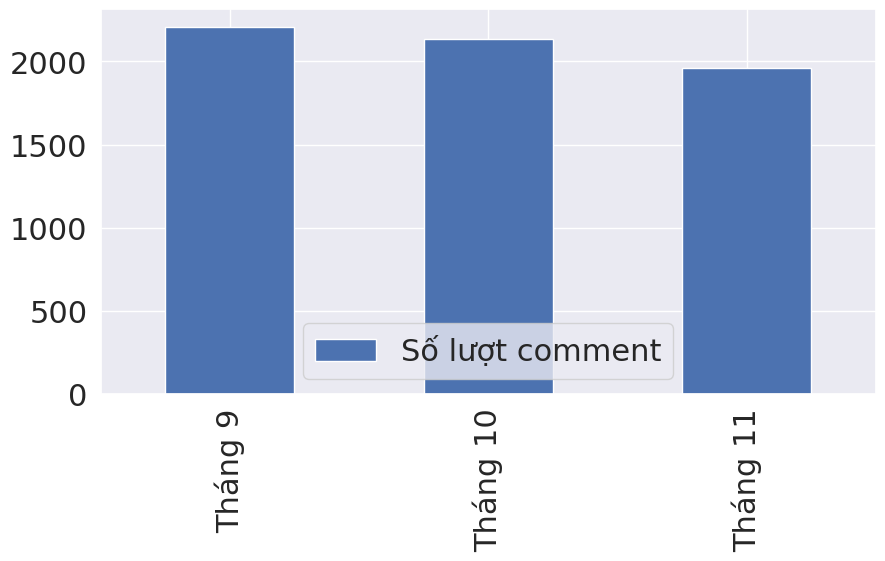

In [31]:
cm_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].comments)
cm_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].comments)
cm_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].comments)
l = pd.DataFrame({'Số lượt comment': [cm_of_month_9,cm_of_month_10,cm_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,5))

In [32]:
month_data = pd.DataFrame({"Thích" : [likes_of_month_9, likes_of_month_10, likes_of_month_11],
                           "Yêu_thích" : [loves_of_month_9, loves_of_month_10, loves_of_month_11],
                           "Wow" : [wow_of_month_9, wow_of_month_10, wow_of_month_11],
                           "Haha" : [haha_of_month_9, haha_of_month_10, haha_of_month_11],
                           "Thương_thương" : [tt_of_month_9, tt_of_month_10, tt_of_month_11],
                           "Buồn" : [buon_of_month_9, buon_of_month_10, buon_of_month_11],
                           "Phẫn_nộ" : [phan_no_of_month_9, phan_no_of_month_10, phan_no_of_month_11],
                           "Shares" : [shares_of_month_9, shares_of_month_10, shares_of_month_11],
                           "Comment" : [cm_of_month_9, cm_of_month_10, cm_of_month_11]})
month_data.index = ['Tháng_9', 'Tháng_10', 'Tháng_11']
month_data

,Thích,Yêu_thích,Wow,Haha,Thương_thương,Buồn,Phẫn_nộ,Shares,Comment
Tháng_9,22788,6408,67,175,201,480,3,608,2204
Tháng_10,13942,5788,59,175,199,26,0,520,2136
Tháng_11,14622,5289,70,1044,223,129,1,529,1959


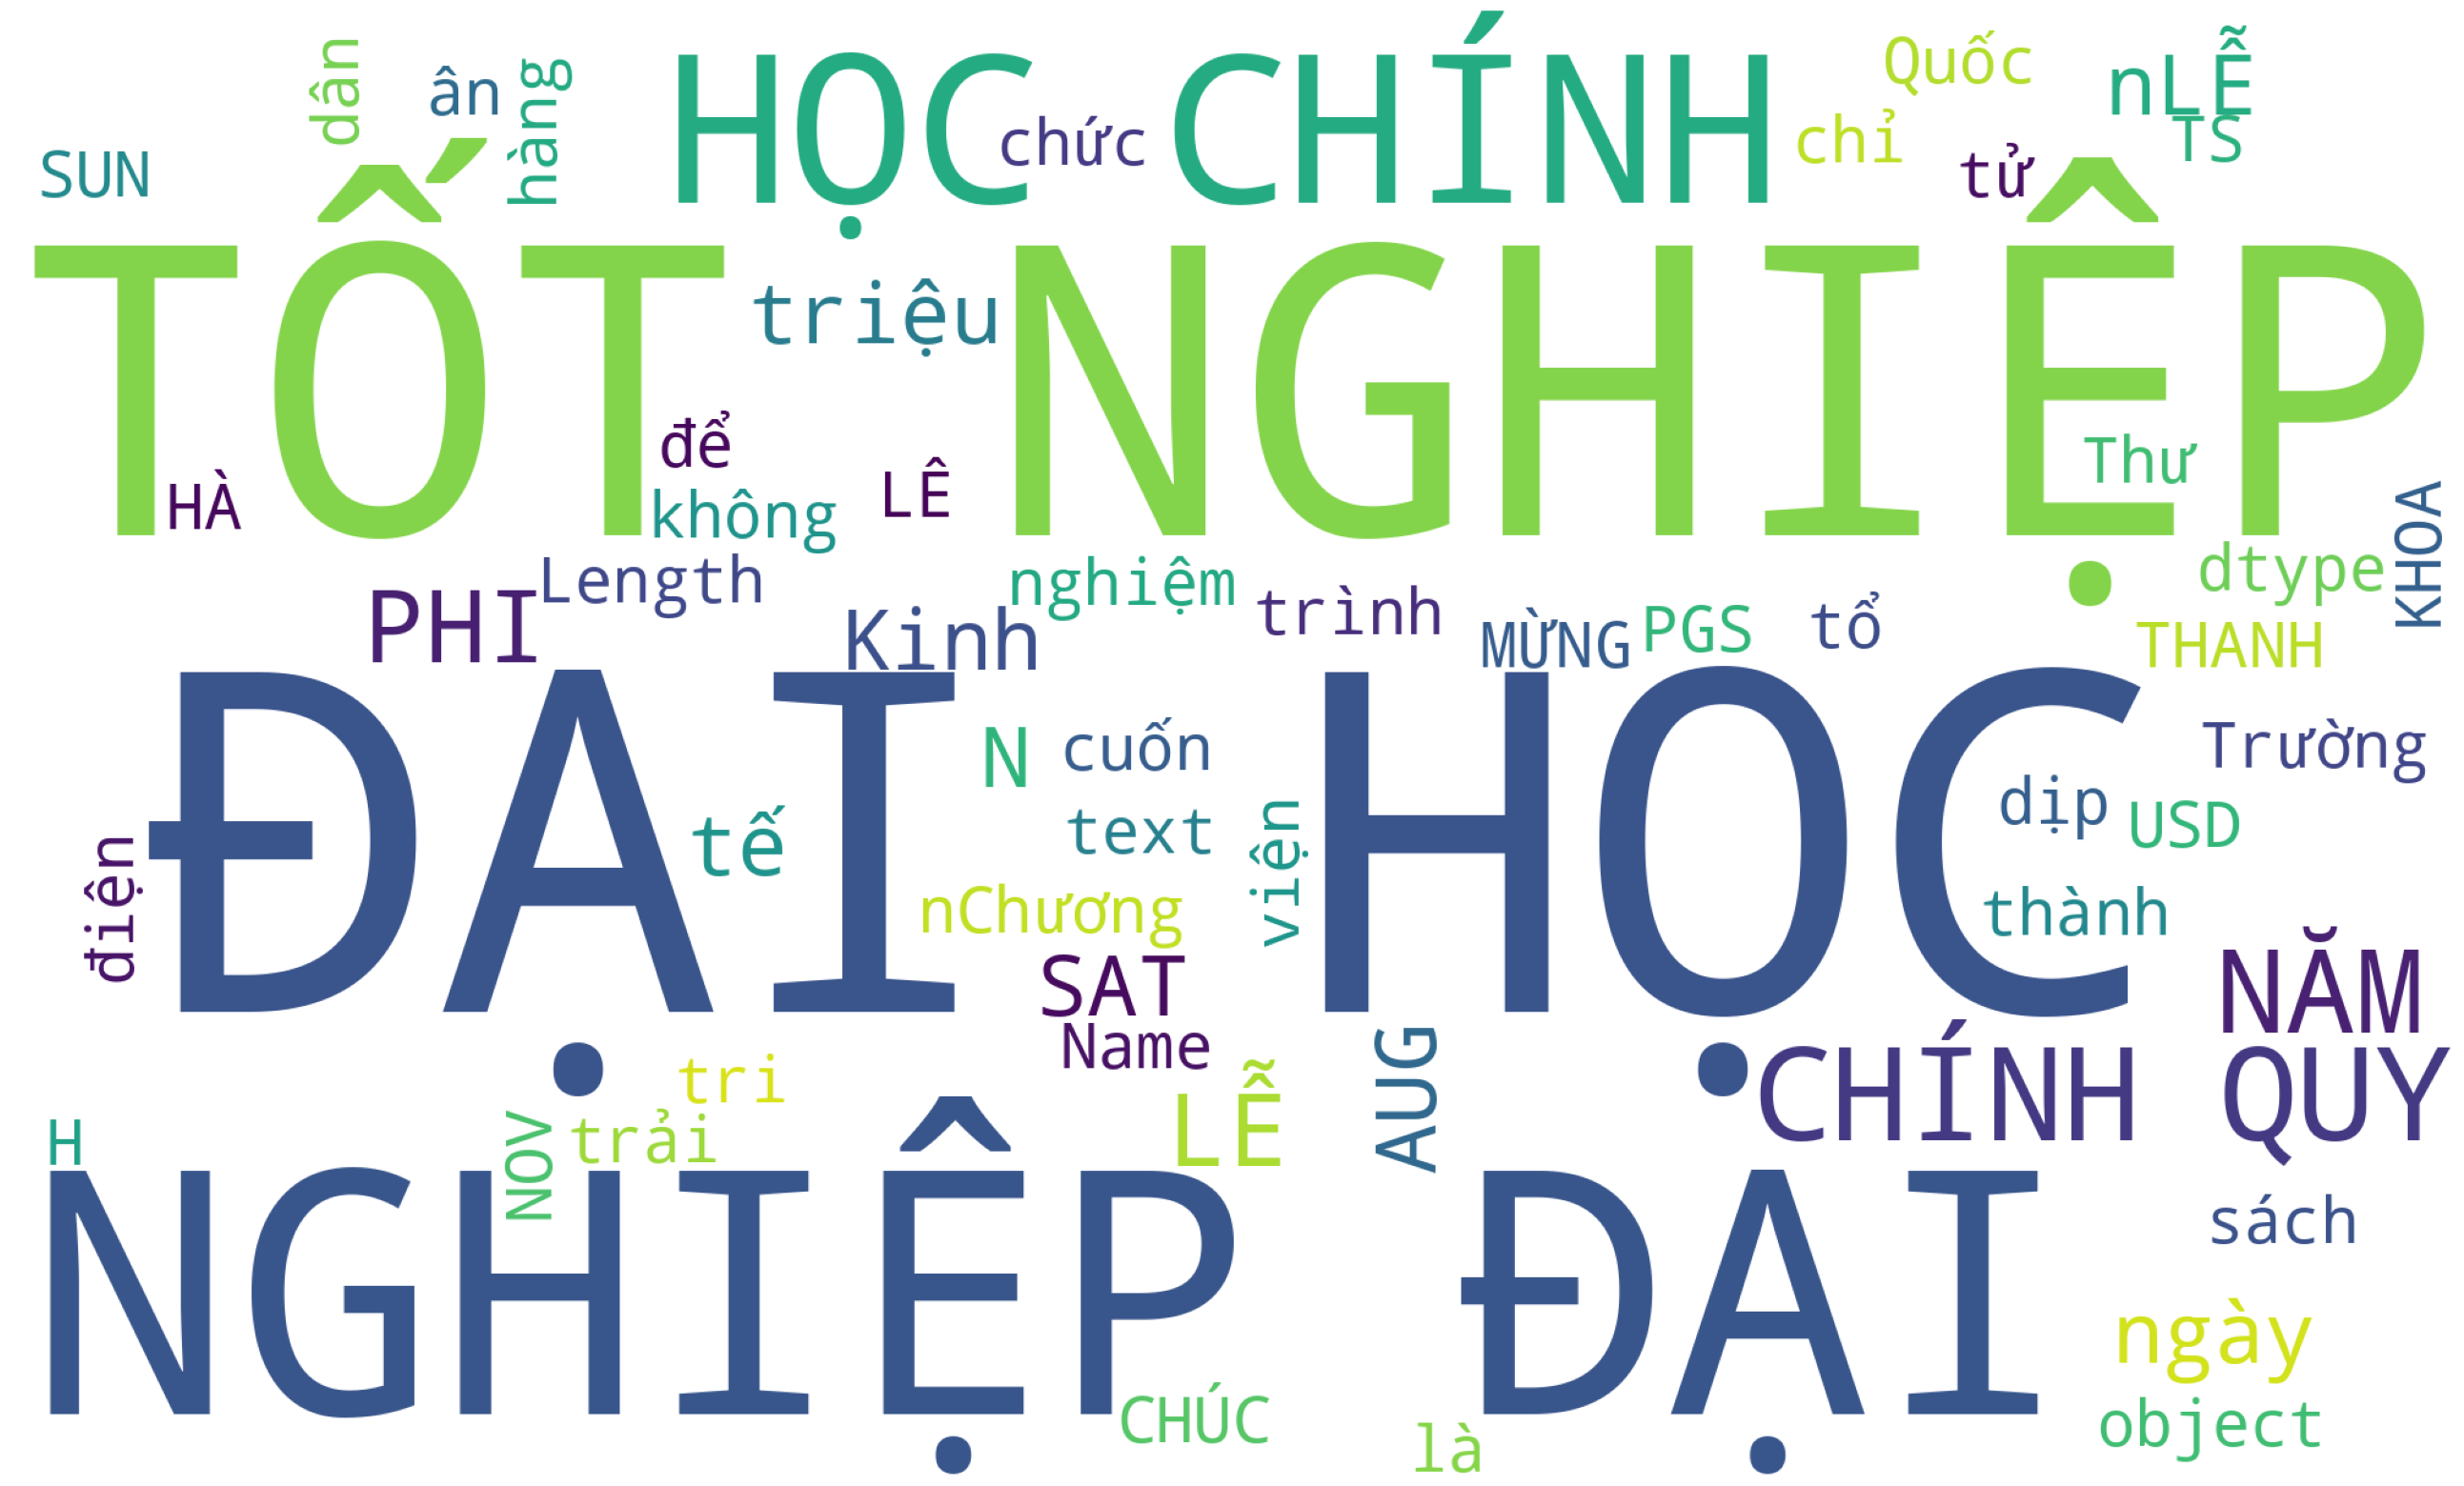

In [34]:
from wordcloud import WordCloud, STOPWORDS

text = str(clean_data['text'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()